# Estudando distribuições de z_score_padrao

O objetivos das próximas aulas é entender os conceitos de distribuição de z_score_padraos, dentre elas, as mais conhecidas **Binomial**, **Normal** e **de Poisson**.

## Problemas motivadores

1) Em uma prova de 10 questões cada acerto vale 1 ponto. A média de uma turma é 6,7 e o desvio padrão 1,2. Admitindo uma distribuição normal, determine: a) a porcentagem de estudantes que obtiveram 6 pontos; b) o grau máximo dos 10% mais baixos da classe; c) o grau mínimo dos 10% mais altos da classe.

2) Sabendo que a média de peso de recém nascidos é de 3kg com um desvio padrão de 1Kg, Determine a probabilidade de termos bêbes abaixo de 2kg e, assim antecipar e planejar as necessidades de atendimento especial dos recém nascidos (alimentação, maior período de internação etc.). Sabendo que um hospital realiza cerca de 20 partos por dia, quantos leitos precisam ser reservados para atendimento a esses casos? Faça um histograma das probabilidades de nascimentos (X=1, 2, 3, ...).



In [ ]:
# Nome: Felipe Barroso de Castro
# RA: 2311292
# Curso: Engenharia de Software

In [24]:
from scipy.stats import norm
from scipy.stats import binom
import matplotlib.pyplot as plt
import numpy as np

In [25]:
# Questão 1

media = 6.7
desvio_padrao = 1.2
corte = 6
distr_inversa_max = 0.10
distr_inversa_min = 0.90

z_score = (corte - media) / desvio_padrao
z_score_inversa_max = norm.ppf(distr_inversa_max)
z_score_inversa_min = norm.ppf(distr_inversa_min)
z_score_padrao = norm.cdf(z_score)

# Calculo do grau máximo
grau_maximo = media + z_score_inversa_max * desvio_padrao
grau_minimo = media + z_score_inversa_min * desvio_padrao

# Convertendo a probabilidade em %
porcentagem = z_score_padrao * 100

# Questão A
print(f"A porcentagem de estudantes que obtiveram 6 pontos é aproximadamente {porcentagem:.2f}%")

# Questão B
print(f"O grau máximo dos 10% mais baixos da classe é aproximadamente {grau_maximo:.2f}")

# Questão C
print(f"O grau mínimo dos 10% mais altos da classe é aproximadamente {grau_minimo:.2f}")

A porcentagem de estudantes que obtiveram 6 pontos é aproximadamente 27.98%
O grau máximo dos 10% mais baixos da classe é aproximadamente 5.16
O grau mínimo dos 10% mais altos da classe é aproximadamente 8.24


A probabilidade de um recém-nascido pesar menos de 2Kg é 15.87%
Leitos necessários para 20 partos por dia: 4


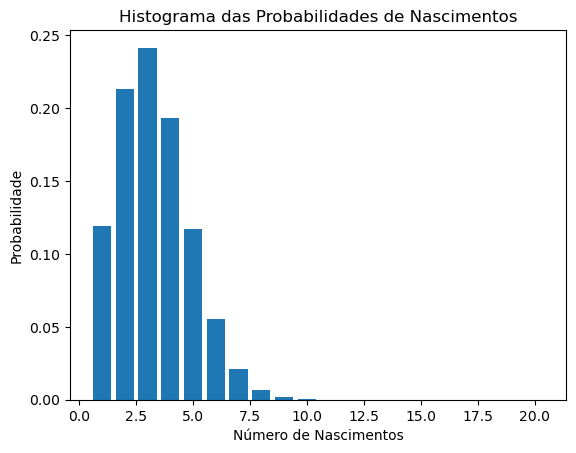

In [36]:
# Questão 2

media = 3 # Kg
desvio_padrao = 1 # Kg
corte = 2 # Kg
partos = 20 # Por dia

probabilidade = norm.cdf(corte, media, desvio_padrao)
nascimentos = partos * probabilidade
leitos = np.ceil(nascimentos)

# Convertendo a probabilidade em %
porcentagem = probabilidade * 100

# Questão A
print(f"A probabilidade de um recém-nascido pesar menos de {corte}Kg é {porcentagem:.2f}%")

# Questão B
print(f"Leitos necessários para {partos} partos por dia: {leitos:.0f}")

# Histograma da Questão B
x = np.arange(1, partos + 1)
probabilidades = binom.pmf(x, partos, probabilidade)

plt.bar(x, probabilidades)
plt.xlabel('Número de Nascimentos')
plt.ylabel('Probabilidade')
plt.title('Histograma das Probabilidades de Nascimentos')
plt.show()


In [2]:
# Aula 7
# Revisão e Z-Scores

## Teorema Central do Limite

## Z-Scores

In [3]:
import numpy as np
import random
import seaborn as sns

In [4]:
x = [21,18,19,19,19,18,19,19,18,21,18,18,18,17,18,18,26,21,21,19,19,18,18,19,20,18,20,18,34]

desvio_padrao = 0
media = np.mean(x)
for i in x:
  desvio_padrao = desvio_padrao + (i-media)**2
desvio_padrao = (desvio_padrao / len(x))**0.5
desvio_padrao_np = np.std(x)
desvio_padrao, desvio_padrao_np, media

(3.1992864840670907, 3.1992864840670907, 19.620689655172413)

C:\Users\fbc2m\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

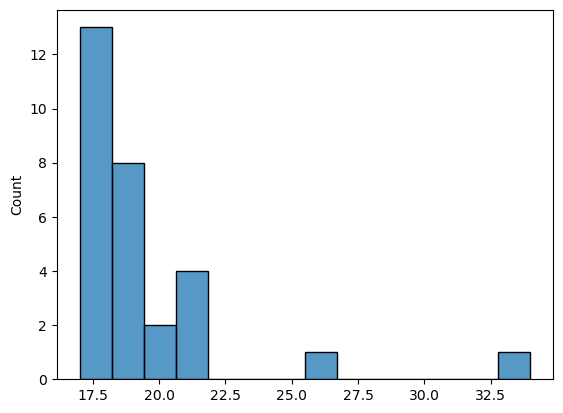

In [5]:
sns.histplot(x)

In [6]:
def zscore(x):
  media = np.mean(x)
  desvio = np.std(x)
  z = []
  for i in x:
    z.append((i-media)/desvio)
  return z
z = zscore(x)
z

[0.4311306135592271,
 -0.5065784709320912,
 -0.19400877610165174,
 -0.19400877610165174,
 -0.19400877610165174,
 -0.5065784709320912,
 -0.19400877610165174,
 -0.19400877610165174,
 -0.5065784709320912,
 0.4311306135592271,
 -0.5065784709320912,
 -0.5065784709320912,
 -0.5065784709320912,
 -0.8191481657625306,
 -0.5065784709320912,
 -0.5065784709320912,
 1.993979087711424,
 0.4311306135592271,
 0.4311306135592271,
 -0.19400877610165174,
 -0.19400877610165174,
 -0.5065784709320912,
 -0.5065784709320912,
 -0.19400877610165174,
 0.11856091872878767,
 -0.5065784709320912,
 0.11856091872878767,
 -0.5065784709320912,
 4.494536646354939]

C:\Users\fbc2m\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

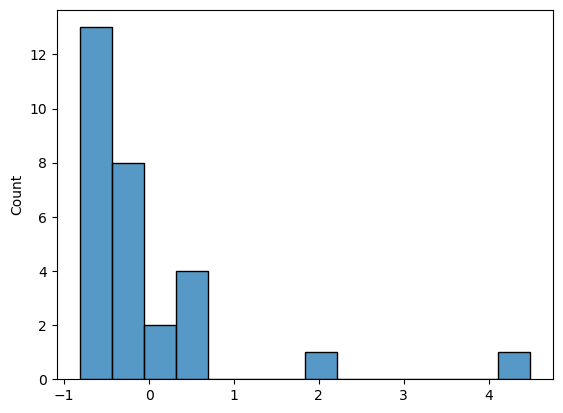

In [7]:
sns.histplot(z)

In [ ]:
# Teorema Central do Limite

# Dada uma população que possui uma distribuição de probabilidade qualquer, 
#a média de amostras dessa distribuição terá distribuição normal.


C:\Users\fbc2m\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

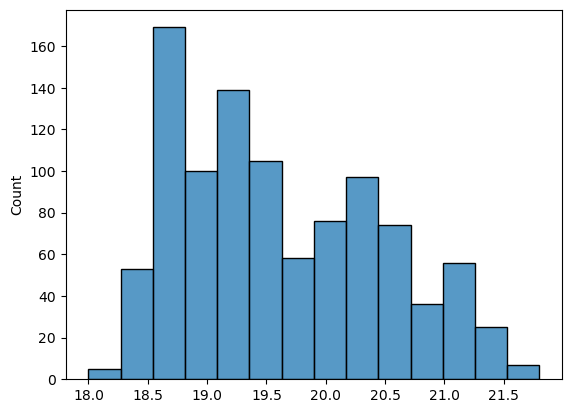

In [8]:
n = 1000
n_amostras = 10
medias = []
for i in range(n):
  escolhidos = np.random.choice(x,size = n_amostras, replace = False)
  media = np.mean(escolhidos)
  medias.append(media)
sns.histplot(medias)

C:\Users\fbc2m\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

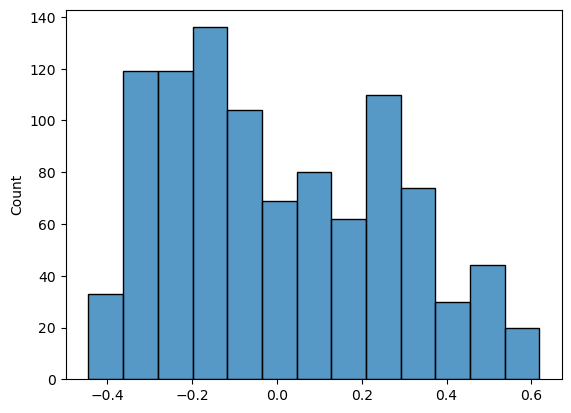

In [9]:
n = 1000
n_amostras = 10
medias = []
for i in range(n):
  escolhidos = np.random.choice(z,size = n_amostras, replace = False)
  media = np.mean(escolhidos)
  medias.append(media)
sns.histplot(medias)

C:\Users\fbc2m\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

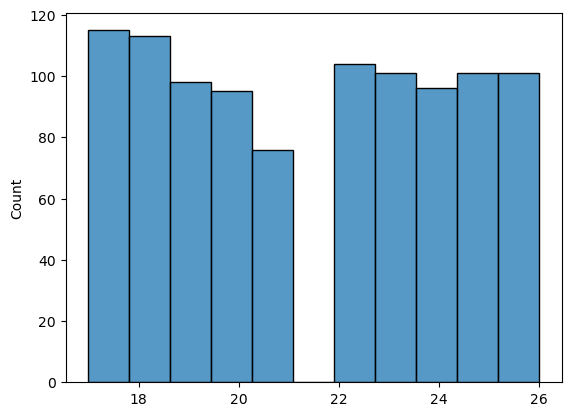

In [10]:
y = []
for i in range(n):
  y.append(random.randint(17,26))
sns.histplot(y)

C:\Users\fbc2m\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

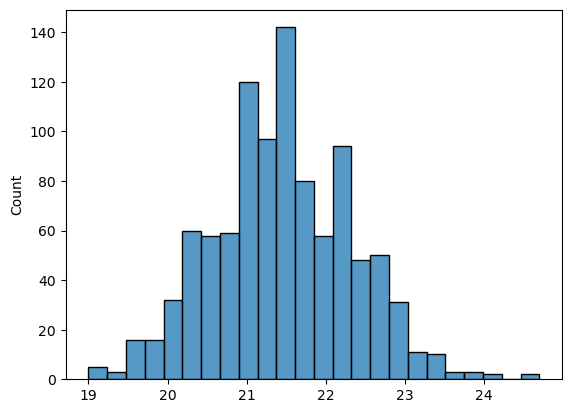

In [11]:
n = 1000
n_amostras = 10
medias = []
for i in range(n):
  escolhidos = np.random.choice(y,size = n_amostras, replace = False)
  media = np.mean(escolhidos)
  medias.append(media)
sns.histplot(medias)